# * model.compile(metrics=[""])
```
- MAE(평균 절대 오차)
: "실제값과 측정값(예측값)과의 차이"의       절대값의 평균
제곱을 하지않아 에러의 크기 그대로 반영
에러에 따른 손실이 선형적으로 올라갈때 적합
이상치에 민감하지 않음
회귀지표
```
```
- MSE(평균 제곱 오차)
: "실제값과 측정값(예측값)과의 차이"의 제곱값의 평균
에러 제곱값으로 에러가 크면 가중치가 높게 반영
예측값과 실제값 차이 면적의 합
특이값 존재할땐 수치 크게 늘어남
에러에 따른 손실이 기하급수적으로 올라가는 상황에 적합
회귀에서 자주 쓰이는 손실함수(정확도 개념은 회귀에 적용되지않음)
```
```
- RMSE(평균제곱오차의 제곱근)
: MSE에 루트 씌운 값
에러 제곱값으로 에러가 크면 가중치가 높게 반영
에러에 따른 손실이 기하급수적으로 올라가는 상황에 적합
```
```
- MSLE(평균 제곱 로그 오차)
: MSE에 로그적용
```
```
- MAPE(평균 절대 퍼센트 오차)
: MAE를 퍼센트 변환
MAE가 이상치에 영향을 많이 받을때 보완한 개념(최대크기제한, 한없이 커지지 않음)
MAE와 같은 단점
모델 편향 존재
```
```
- MPE(평균 퍼센트 오차)
: MAPE에서 절대값 제외
모델이 underperformance(+) 인지 overperformance(-) 인지 판단 (예측값이 실제값보다 높은 값으로 예측하는지, 낮은값으로 예측하는지)
```

# keras_DNN
-1 ~ +1, 0.001

y = x^2 + sin(x*10)

loss가 낮아지는게 학습되는것

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

## 데이터 준비

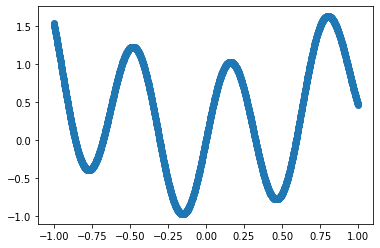

In [ ]:
x = np.arange(-1, 1, 0.001)
np.random.shuffle(x)
y = x**2 + np.sin(x*10)

plt.scatter(x,y)
plt.show()

## 데이터 나누기
train : test = 8 : 2

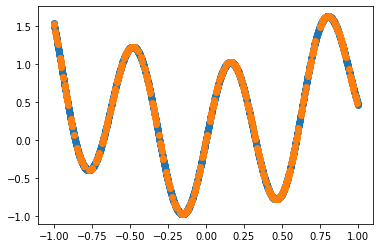

In [ ]:
split_index = int(x.shape[0]*0.8)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show()

# 모델
- 입력 1개 
- 히든레이어 2개 (노드의 개수 10개)
- 출력 1개

### optimizer="Adam"

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="Adam")

hist = model.fit(train_x, train_y, epochs=100, batch_size=128, verbose=0, validation_split=0.1)

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'val_loss'])


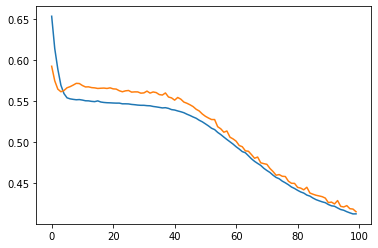

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

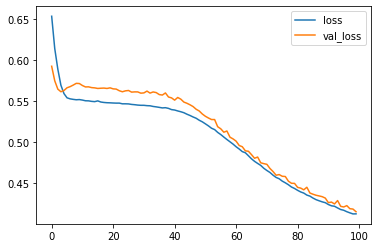

In [ ]:
# 범례 지정
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

loss와 val_loss 모두 줄어드는 추세

학습이 중반을 지나니 잘 되어가는 것으로 보여짐

### optimizer="SGD"

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="SGD")

hist = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1)

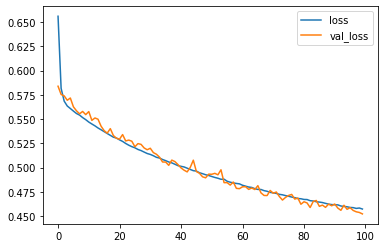

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


loss와 val_loss 모두 줄어드는 추세

학습이 과적합 없이 잘 되어가는 것으로 보임

### optimizer="RMSProp"

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="RMSProp")

hist = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1)

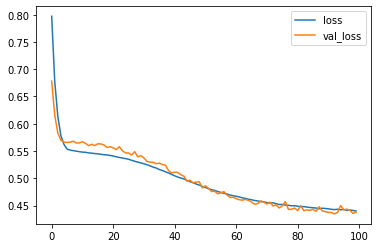

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


loss와 val_loss 모두 줄어드는 추세

학습이 과적합 없이 잘 되어가는 것으로 보임

### optimizer="AdaGrad"

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="AdaGrad")

hist = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1)

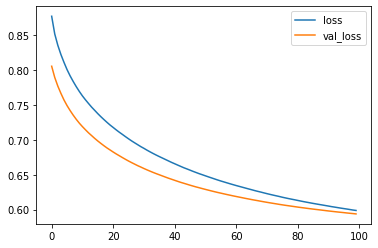

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


loss와 val_loss 모두 줄어드는 추세

학습이 잘 되어가는 것으로 보임

# 히든레이어 1개로 바꾸기

In [ ]:
# optimizer="AdaGrad"
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="AdaGrad")

hist = model.fit(train_x, train_y, epochs=100, batch_size=128, verbose=0, validation_split=0.1)

## 예측한 값을 그래프로 나타냄

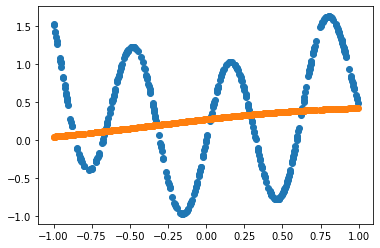

In [ ]:
y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

레이어 하나면 학습이 잘 안됨

## 히든레이어 2개 예측그래프

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="AdaGrad")

hist = model.fit(train_x, train_y, epochs=100, batch_size=128, verbose=0, validation_split=0.1)


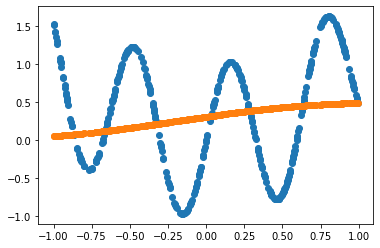

In [ ]:
y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

학습이 거의 안됨 (epochs 늘려줌)

# 학습량 * 100

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="AdaGrad")

hist = model.fit(train_x, train_y, epochs=10000, batch_size=128, verbose=0, validation_split=0.1)

## 예측한 값을 그래프로 나타냄

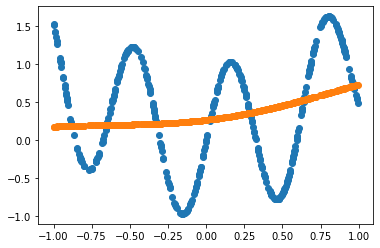

In [ ]:
y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

학습 비슷

# activation='relu', 학습량 = 1000

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="AdaGrad")

hist = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.1)

## 예측한 값을 그래프로 나타냄

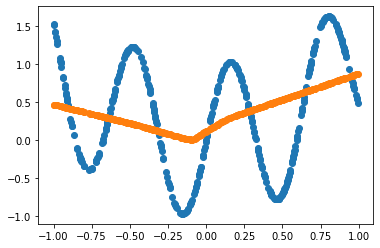

In [ ]:
y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

완전 조금 좋아짐

# activation='tanh', 학습량 = 1000

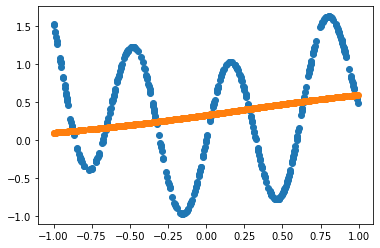

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="AdaGrad")

hist = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.1)

y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

학습 별차이 없음

# 데이터수 10배 감소 
대신 학습량 10000


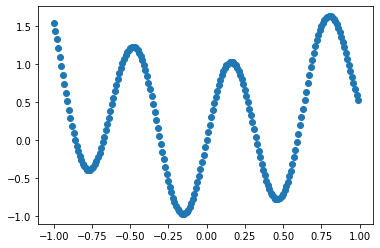

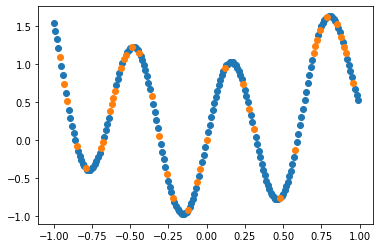

In [ ]:
x = np.arange(-1, 1, 0.01)
np.random.shuffle(x)
y = x**2 + np.sin(x*10)

plt.scatter(x,y)
plt.show()

split_index = int(x.shape[0]*0.8)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show()

## 예측한 값을 그래프로 나타냄

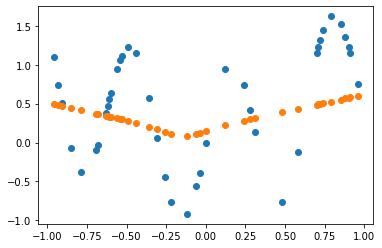

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="AdaGrad")

hist = model.fit(train_x, train_y, epochs=10000, batch_size=128, verbose=0, validation_split=0.1)

y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

학습이 조금 좋아지는중

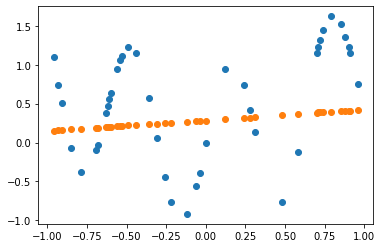

In [ ]:
# activation='tanh'
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="AdaGrad")

hist = model.fit(train_x, train_y, epochs=10000, batch_size=128, verbose=0, validation_split=0.1)

y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

나름 좋아지는중

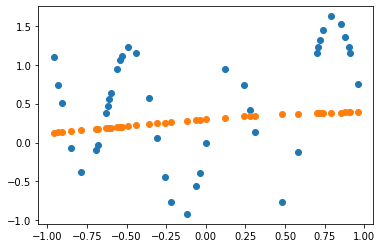

In [ ]:
# epochs=1000으로 줄여봄
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="AdaGrad")

hist = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.1)

y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

학습이 하나도 안됨

# 데이터 수 원상태로
 optimizer="RMSProp"

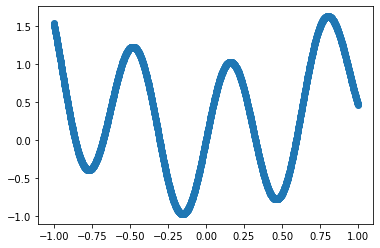

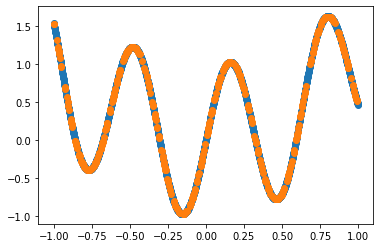

In [ ]:
x = np.arange(-1, 1, 0.001)
np.random.shuffle(x)
y = x**2 + np.sin(x*10)

plt.scatter(x,y)
plt.show()

split_index = int(x.shape[0]*0.8)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show()

## 예측한 값을 그래프로 나타냄

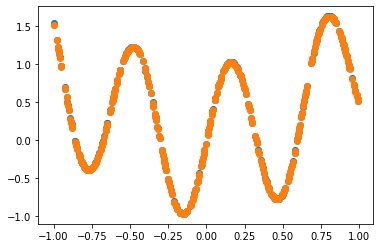

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="RMSProp")

hist = model.fit(train_x, train_y, epochs=10000, batch_size=128, verbose=0, validation_split=0.1)

y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

## loss, mae 추가

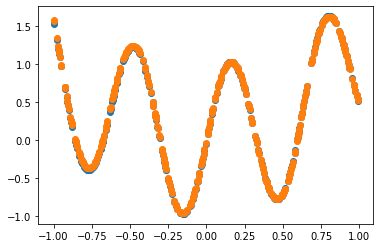

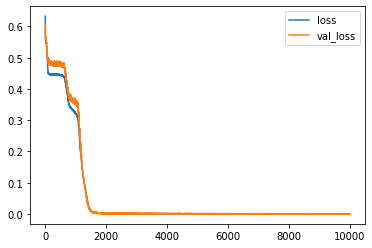

13/13 [==============================] - 0s 2ms/step - loss: 1.7072e-04 - mae: 0.0106
loss =  0.00017072267655748874
mae =  0.010564565658569336


In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss = "mse", optimizer="RMSProp", metrics=["mae"])

hist = model.fit(train_x, train_y, epochs=10000, batch_size=128, verbose=0, validation_split=0.1)

y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

loss, mae = model.evaluate(test_x, test_y)
print("loss = ", loss)
print("mae = ", mae)

과적합 없이 loss 줄어드는 추세로 보임

예측값으로 그려본 그래프도 가장 학습이 잘된것으로 보여짐

가장 좋은 모델로 채택